In [1]:
import galprime as gp

import photutils

from photutils.morphology import data_properties

from matplotlib import pyplot as plt

import numpy as np

import warnings

# Test extraction on bare models

No noise or interlopers

40


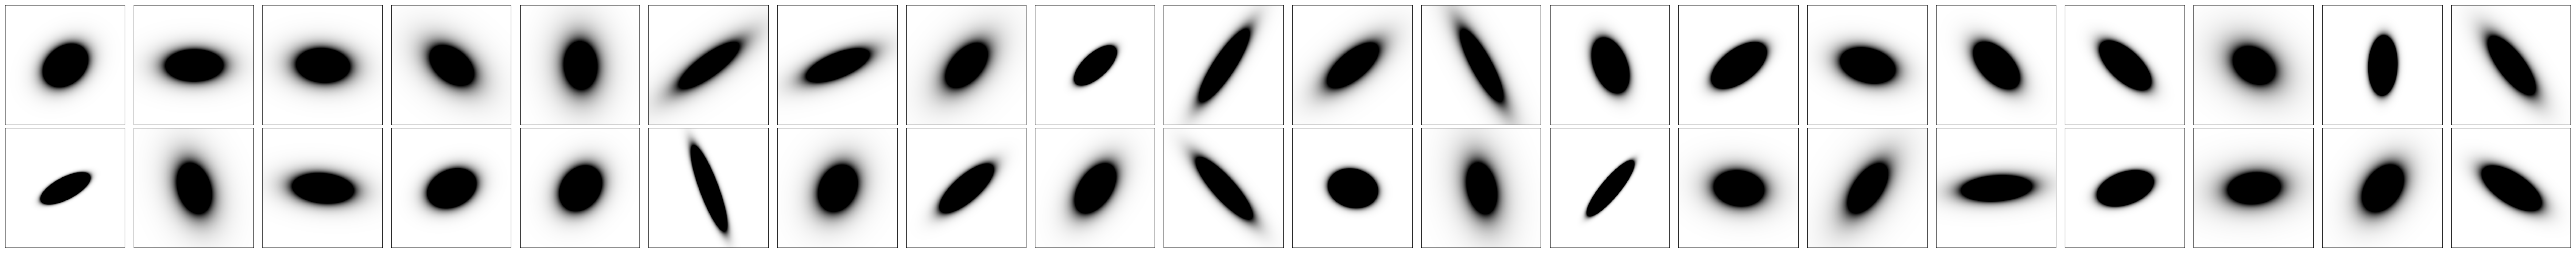

In [2]:
models = gp.gen_sersic_models(n_models=40, width=151)

gp.plotting.show_cutouts(models, ncols=20, nrows=2)

In [3]:
import photutils.morphology


def estimate_geometry(image, mask=None):
    return data_properties(image, mask=mask).to_table()[0]


def isophote_fitting(image, mask=None, config=None):
    try:
        morph = estimate_geometry(image)
    
        geo = gp.EllipseGeometry(x0=morph["xcentroid"], y0=morph["ycentroid"], 
                                sma= morph["semimajor_sigma"].value, 
                                eps=1 - (morph["semiminor_sigma"] / morph["semimajor_sigma"]).value, 
                                pa=morph["orientation"].value)
    except Exception as e:
        geo = None
    
    warnings.filterwarnings("ignore")

    return None

isolists = []
for cutout in models.cutouts:
    isolists.append(isophote_fitting(cutout))

TypeError: 'NoneType' object is not subscriptable

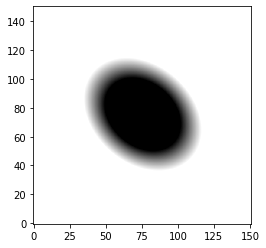

In [5]:
for i, cutout in enumerate(models.cutouts):
    plt.figure()
    plt.imshow(np.log10(cutout), origin='lower', cmap='gray_r', vmin=-4, vmax=-3)
    
    for t in isolists[i][1::3]:
        coords_x, coords_y = t.sampled_coordinates()

        plt.scatter(coords_x, coords_y, color='red', s=0.5)

    plt.savefig(f"figures/bare_extractions/ext_{i}.png")
    plt.close()